In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# Harris Corners

# 1

In [2]:
simA = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_4\simA.jpg')
simB = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_4\simB.jpg')
transA = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_4\transA.jpg')
transB = cv2.imread(r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\computer_vision\course_resources\ps_4\transB.jpg')
simA_gray = cv2.cvtColor(simA, cv2.COLOR_BGR2GRAY)
simB_gray = cv2.cvtColor(simB, cv2.COLOR_BGR2GRAY)
transA_gray = cv2.cvtColor(transA, cv2.COLOR_BGR2GRAY)
transB_gray = cv2.cvtColor(transB, cv2.COLOR_BGR2GRAY)

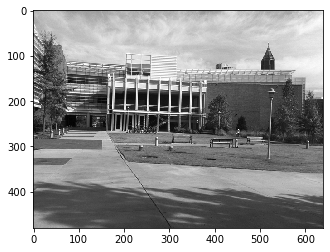

In [3]:
plt.imshow(simA_gray, cmap='gray')
plt.show()

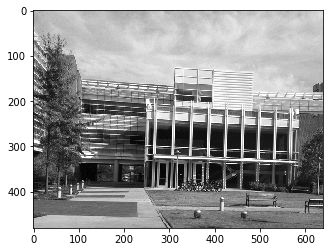

In [4]:
plt.imshow(transA_gray, cmap='gray')
plt.show()

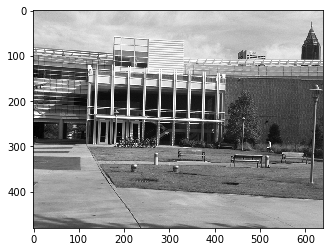

In [5]:
plt.imshow(transB_gray, cmap='gray')
plt.show()

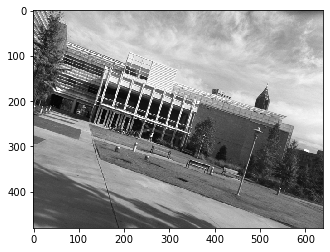

In [6]:
plt.imshow(simB_gray, cmap='gray')
plt.show()

In [7]:
def calculate_gx(img, ksize):
    return cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)

def calculate_gy(img, ksize):
    return cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

In [8]:
def show_gradients_img(img):
    gx = calculate_gx(img, ksize=3)
    gy = calculate_gy(img, ksize=3)

    gx = cv2.convertScaleAbs(gx)
    gy = cv2.convertScaleAbs(gy)
    
    gradients = np.concatenate((gx,gy), axis=1)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(gradients, cmap='gray')
    plt.show()

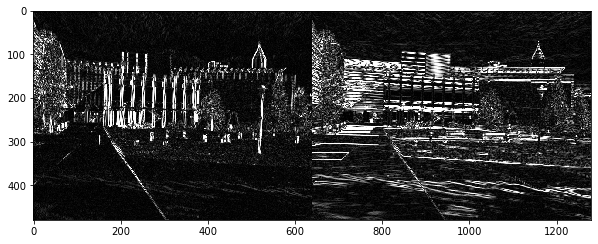

In [9]:
show_gradients_img(simA_gray)

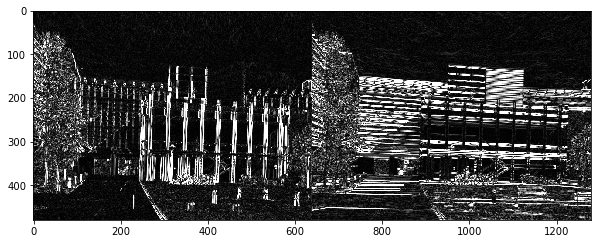

In [10]:
show_gradients_img(transA_gray)

In [11]:
from scipy.ndimage import gaussian_filter
def calculate_harris_response(I_x, I_y):
    Ixx = gaussian_filter(I_x**2, sigma=1)
    Ixy = gaussian_filter(I_y*I_x, sigma=1)
    Iyy = gaussian_filter(I_y**2, sigma=1)
    
    k = 0.05

    detA = Ixx * Iyy - Ixy ** 2

    traceA = Ixx + Iyy

    harris_response = detA - k * traceA ** 2
    return harris_response

harris_response_simA = calculate_harris_response(calculate_gx(simA_gray, ksize=3), calculate_gy(simA_gray, ksize=3))
harris_response_simB = calculate_harris_response(calculate_gx(simB_gray, ksize=3), calculate_gy(simB_gray, ksize=3))
harris_response_transA = calculate_harris_response(calculate_gx(transA_gray, ksize=3), calculate_gy(transA_gray, ksize=3))
harris_response_transB = calculate_harris_response(calculate_gx(transB_gray, ksize=3), calculate_gy(transB_gray, ksize=3))

In [12]:
def plot_corners(img, harris_response_img, threshold, window_size):
    img_copy_for_corners = np.copy(img)

    for i in np.arange(harris_response_img.shape[0], step=window_size):
        for j in np.arange(harris_response_img.shape[1], step=window_size):
            max_idx = np.argmax(harris_response_img[i:i+window_size, j:j+window_size])
            if np.max(harris_response_img[i:i+window_size, j:j+window_size]) > threshold:
                img_copy_for_corners[i + int(max_idx/window_size), j + max_idx%window_size] = [255,0,0]
                
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    ax.set_title("corners found")
    ax.imshow(img_copy_for_corners)
    plt.show()
    
def calculate_keypoints(img, harris_response_img, threshold, window_size):
    keypoints = []
    for i in np.arange(harris_response_img.shape[0] - window_size, step=window_size):
        for j in np.arange(harris_response_img.shape[1] - window_size, step=window_size):
            max_idx = np.argmax(harris_response_img[i:i+window_size, j:j+window_size])
            if np.max(harris_response_img[i:i+window_size, j:j+window_size]) > threshold:
                keypoints.append((i + int(max_idx/window_size), j + max_idx%window_size))
                
    return keypoints

def calculate_angles(img):
    gx = calculate_gx(img, ksize=3)
    gy = calculate_gy(img, ksize=3)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    return angle

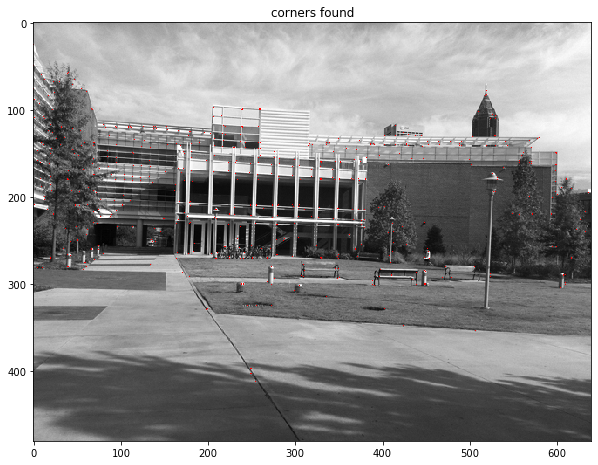

In [13]:
plot_corners(simA, harris_response_simA, threshold=1e8, window_size=10)

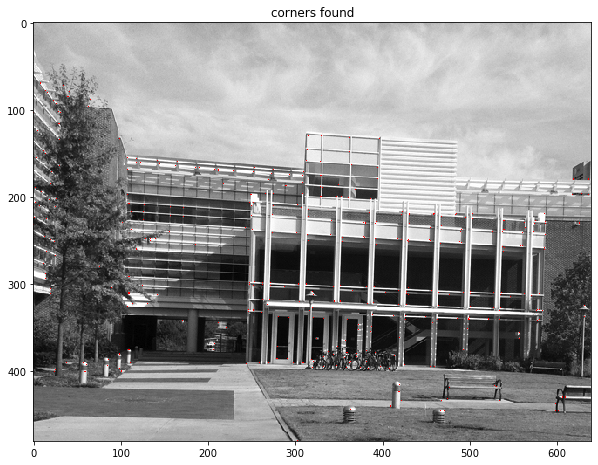

In [14]:
plot_corners(transA, harris_response_transA, threshold=1e9, window_size=10)

# 2 (SIFT)

In [15]:
keypoints_transA = calculate_keypoints(transA, harris_response_transA, threshold=1e9, window_size=40)
keypoints_transB = calculate_keypoints(transB, harris_response_transB, threshold=1e9, window_size=40)
keypoints_simA = calculate_keypoints(simA, harris_response_simA, threshold=1e9, window_size=40)
keypoints_simB = calculate_keypoints(simB, harris_response_simB, threshold=1e9, window_size=40)

In [16]:
angles_transA = calculate_angles(transA_gray)
angles_transB = calculate_angles(transB_gray)
angles_simA = calculate_angles(simA_gray)
angles_simB = calculate_angles(simB_gray)

In [17]:
def list_keypoints(keypoints, angles):
    k_points = []
    
    for point in keypoints:
        keypoint = cv2.KeyPoint(x=float(point[1]), y=float(point[0]), size=10, angle=angles[point], octave=0)
        k_points.append(keypoint)
    
    return k_points

In [18]:
sift = cv2.SIFT_create()


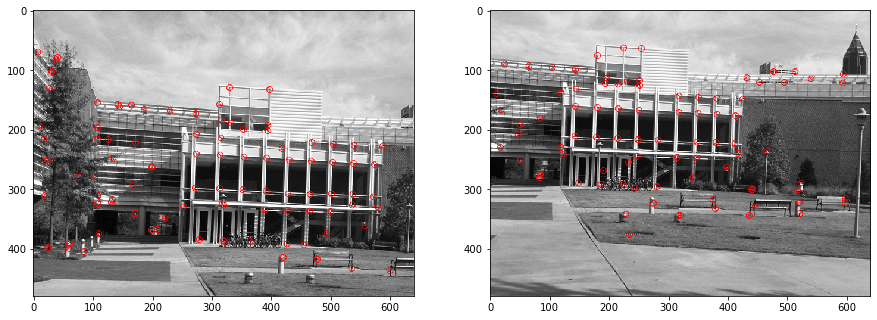

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
k_points_transA = list_keypoints(keypoints_transA, angles_transA)
k_points_transB = list_keypoints(keypoints_transB, angles_transB)
k_points_simA = list_keypoints(keypoints_simA, angles_simA)
k_points_simB = list_keypoints(keypoints_simB, angles_simB)
k_points_transA, descriptors_transA = sift.compute(transA_gray, k_points_transA)
k_points_transB, descriptors_transB = sift.compute(transB_gray, k_points_transB)
k_points_simA, descriptors_simA = sift.compute(simA_gray, k_points_simA)
k_points_simB, descriptors_simB = sift.compute(simB_gray, k_points_simB)
mg_1 = cv2.drawKeypoints(transA_gray, k_points_transA, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
mg_2 = cv2.drawKeypoints(transB_gray, k_points_transB, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
mg_1_sim = cv2.drawKeypoints(simA_gray, k_points_simA, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
mg_2_sim = cv2.drawKeypoints(simB_gray, k_points_simB, 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
ax[0].imshow(mg_1)
ax[1].imshow(mg_2)
plt.show()

In [20]:
mg_paired = np.concatenate((mg_1, mg_2), axis=1)
mg_paired_sim = np.concatenate((mg_1_sim, mg_2_sim), axis=1)

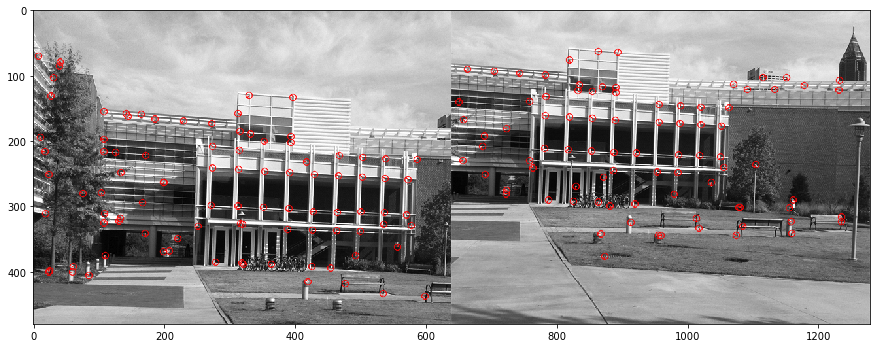

In [21]:
plt.figure(figsize=(15, 10))
plt.imshow(mg_paired)

# feature matching

In [22]:
bfm = cv2.BFMatcher()

In [23]:
matches_trans = bfm.match(descriptors_transA, descriptors_transB)
matches_sim = bfm.match(descriptors_simA, descriptors_simB)

In [24]:
mg_paired1 = mg_paired.copy()
mg_paired1_sim = mg_paired_sim.copy()

In [25]:
for match in matches_trans:
    pt1 = (int(k_points_transA[match.queryIdx].pt[0]), int(k_points_transA[match.queryIdx].pt[1]))
    pt2 = k_points_transB[match.trainIdx].pt
    new_pt2_x = int(pt2[0] + transA_gray.shape[1])
    new_pt2 = (new_pt2_x, int(pt2[1]))
    mg_paired1 = cv2.line(mg_paired1, pt1, new_pt2, color = (0, 255, 0), thickness = 2)
    
for match in matches_sim:
    pt1 = (int(k_points_simA[match.queryIdx].pt[0]), int(k_points_simA[match.queryIdx].pt[1]))
    pt2 = k_points_simB[match.trainIdx].pt
    new_pt2_x = int(pt2[0] + simA_gray.shape[1])
    new_pt2 = (new_pt2_x, int(pt2[1]))
    mg_paired1_sim = cv2.line(mg_paired1_sim, pt1, new_pt2, color = (0, 255, 0), thickness = 2)    

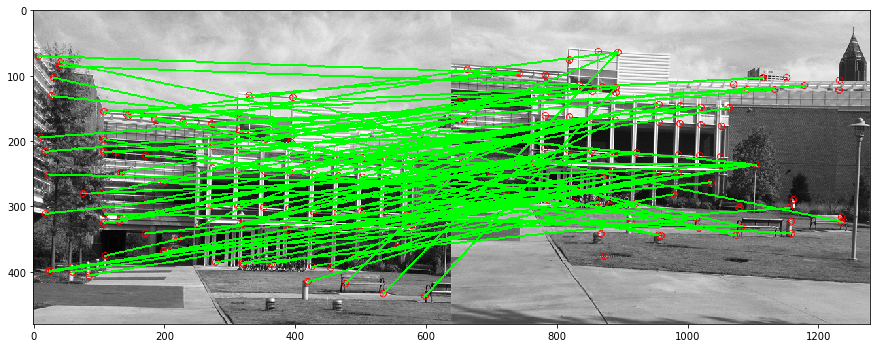

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(mg_paired1)

In [27]:
translation_matches_trans = []
for match in matches_trans:
    trans_x = k_points_transB[match.trainIdx].pt[0] + transA_gray.shape[1] - k_points_transA[match.queryIdx].pt[0]
    trans_y = k_points_transB[match.trainIdx].pt[1] - k_points_transA[match.queryIdx].pt[1]
    translation_matches_trans.append((trans_x, trans_y))
    
translation_matches_sim = []
for match in matches_sim:
    trans_x = k_points_simB[match.trainIdx].pt[0] + simA_gray.shape[1] - k_points_simA[match.queryIdx].pt[0]
    trans_y = k_points_simB[match.trainIdx].pt[1] - k_points_simA[match.queryIdx].pt[1]
    translation_matches_sim.append((trans_x, trans_y))
    

In [28]:
translation_matches_trans = np.array(translation_matches_trans)
translation_matches_sim = np.array(translation_matches_sim)

# 3(RANSAC)

In [29]:
# a
import math
def fit(trans_data, threshold):

    num_iterations = math.inf
    iterations_done = 0
    num_sample = 1

    max_inlier_count = 0
    best_model = None

    prob_outlier = 0.5
    desired_prob = 0.95
    data_size = len(trans_data)
    
    
    while num_iterations > iterations_done:

        sample_data = trans_data[random.randint(0,len(trans_data) - 1)]
        err_x = np.abs(trans_data[:, 0] - sample_data[0])
        err_y = np.abs(trans_data[:, 1] - sample_data[1])
        inliers = (err_x < threshold[0]) & (err_y < threshold[1])
        inlier_count = np.count_nonzero(inliers) 

        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_model = sample_data
            best_inliers = inliers


        prob_outlier = 1 - inlier_count/data_size
        print('# inliers:', inlier_count)
        print('# prob_outlier:', prob_outlier)
        num_iterations = math.log(1 - desired_prob)/math.log(1 - (1 - prob_outlier)**num_sample)
        iterations_done = iterations_done + 1

        print('# s:', iterations_done)
        print('# n:', num_iterations)
        print('# max_inlier_count: ', max_inlier_count)

    return best_model, best_inliers

In [30]:
best_trans, inliers = fit(translation_matches_trans, threshold=np.std(translation_matches_trans, axis=0) / 5)

# inliers: 4
# prob_outlier: 0.9574468085106383
# s: 1
# n: 68.89098682108592
# max_inlier_count:  4
# inliers: 2
# prob_outlier: 0.9787234042553191
# s: 2
# n: 139.2961818588915
# max_inlier_count:  4
# inliers: 20
# prob_outlier: 0.7872340425531915
# s: 3
# n: 12.522410095720135
# max_inlier_count:  20
# inliers: 1
# prob_outlier: 0.9893617021276596
# s: 4
# n: 280.0982975638243
# max_inlier_count:  20
# inliers: 5
# prob_outlier: 0.9468085106382979
# s: 5
# n: 54.808256121209624
# max_inlier_count:  20
# inliers: 1
# prob_outlier: 0.9893617021276596
# s: 6
# n: 280.0982975638243
# max_inlier_count:  20
# inliers: 3
# prob_outlier: 0.9680851063829787
# s: 7
# n: 92.36031462635862
# max_inlier_count:  20
# inliers: 1
# prob_outlier: 0.9893617021276596
# s: 8
# n: 280.0982975638243
# max_inlier_count:  20
# inliers: 1
# prob_outlier: 0.9893617021276596
# s: 9
# n: 280.0982975638243
# max_inlier_count:  20
# inliers: 1
# prob_outlier: 0.9893617021276596
# s: 10
# n: 280.0982975638243
# 

In [31]:
mg_paired2 = mg_paired.copy()

In [32]:
for match in np.array(matches_trans)[inliers]:
    pt1 = (int(k_points_transA[match.queryIdx].pt[0]), int(k_points_transA[match.queryIdx].pt[1]))
    pt2 = k_points_transB[match.trainIdx].pt
    new_pt2_x = int(pt2[0] + transA_gray.shape[1])
    new_pt2 = (new_pt2_x, int(pt2[1]))
    mg_paried2 = cv2.line(mg_paired2, pt1, new_pt2, color = (0, 0, 255), thickness = 2)   

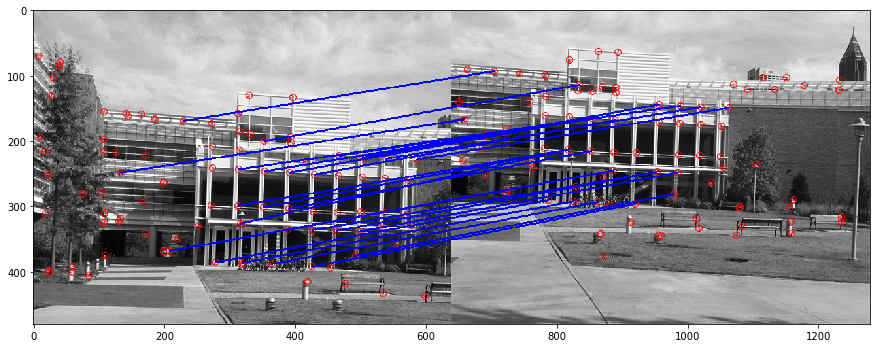

In [33]:
plt.figure(figsize=(15,10))
plt.imshow(mg_paired2)
plt.show()

# b

In [34]:
from sympy import symbols, Eq, solve
def solve_similar_equation(f_match, s_match):
    pt1 = (int(k_points_simA[f_match.queryIdx].pt[0]), int(k_points_simA[f_match.queryIdx].pt[1]))
    pt2 = (int(k_points_simB[f_match.trainIdx].pt[0]), int(k_points_simB[f_match.trainIdx].pt[1]))
    pt3 = (int(k_points_simA[s_match.queryIdx].pt[0]), int(k_points_simA[s_match.queryIdx].pt[1]))
    pt4 = (int(k_points_simB[s_match.trainIdx].pt[0]), int(k_points_simB[s_match.trainIdx].pt[1]))
    a, b, c, d = symbols('a b c d')
    
    eq1 = Eq(a * pt1[0] - b * pt1[1] + c - pt2[0], 0)
    eq2 = Eq(b * pt1[0] + a * pt1[1] + d - pt2[1], 0)
    eq3 = Eq(a * pt3[0] - b * pt3[1] + c - pt4[0], 0)
    eq4 = Eq(b * pt3[0] + a * pt3[1] + d - pt4[1], 0)

    return solve((eq1,eq2,eq3,eq4), (a, b, c, d))

def check_if_match_is_fitted(match, sim, threshold):
    sim_values = list(sim.values())
    a, b, c, d = sim_values[0], sim_values[1], sim_values[2], sim_values[3]
    
    sim_trans = np.array([[a, -b, c], [b, a, d]])
    pt = np.ones(3)
    pt[:2] = k_points_simA[match.queryIdx].pt    
    pred_pt = np.dot(sim_trans, pt)
    err_x = np.abs(int(k_points_simB[match.trainIdx].pt[0]) - int(pred_pt[0]))
    err_y = np.abs(int(k_points_simB[match.trainIdx].pt[1]) - int(pred_pt[1]))
    
    return (err_x < threshold[0]) & (err_y < threshold[1])

In [35]:
def fit_similar(data, threshold):

    num_iterations = math.inf
    iterations_done = 0
    num_sample = 2

    max_inlier_count = 0
    best_model = None

    prob_outlier = 0.1
    desired_prob = 0.99
    data_size = len(data)
    
    # Adaptively determining the number of iterations
    while num_iterations > iterations_done:
        inliers = []
        samples = random.sample(range(0, len(data) - 1), 2)
        sample_data = data[samples]
        sim_trans = solve_similar_equation(sample_data[0], sample_data[1])
        for match in matches_sim:
            if check_if_match_is_fitted(match, sim_trans, threshold):
                inliers.append(match)

        inlier_count = len(inliers)
        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_model = sim_trans
            best_inliers = inliers


        prob_outlier = 1 - inlier_count/data_size
        print('# inliers:', inlier_count)
        print('# prob_outlier:', prob_outlier)
        num_iterations = math.log(1 - desired_prob)/math.log(1 - (1 - prob_outlier)**num_sample)
        iterations_done = iterations_done + 1

        print('# s:', iterations_done)
        print('# n:', num_iterations)
        print('# max_inlier_count: ', max_inlier_count)

    return best_model, best_inliers

In [36]:
best_sim_transform, best_sim_inliers = fit_similar(np.array(matches_sim), [50,50])

# inliers: 31
# prob_outlier: 0.5507246376811594
# s: 1
# n: 20.42596619192743
# max_inlier_count:  31
# inliers: 6
# prob_outlier: 0.9130434782608696
# s: 2
# n: 606.7282591716298
# max_inlier_count:  31
# inliers: 26
# prob_outlier: 0.6231884057971014
# s: 3
# n: 30.07242012876135
# max_inlier_count:  31
# inliers: 31
# prob_outlier: 0.5507246376811594
# s: 4
# n: 20.42596619192743
# max_inlier_count:  31
# inliers: 9
# prob_outlier: 0.8695652173913043
# s: 5
# n: 268.37249951253375
# max_inlier_count:  31
# inliers: 10
# prob_outlier: 0.855072463768116
# s: 6
# n: 216.94142108722946
# max_inlier_count:  31
# inliers: 20
# prob_outlier: 0.7101449275362319
# s: 7
# n: 52.47677962700457
# max_inlier_count:  31
# inliers: 29
# prob_outlier: 0.5797101449275363
# s: 8
# n: 23.69328162118989
# max_inlier_count:  31
# inliers: 36
# prob_outlier: 0.4782608695652174
# s: 9
# n: 14.493284778268203
# max_inlier_count:  36
# inliers: 5
# prob_outlier: 0.927536231884058
# s: 10
# n: 874.704004673

In [37]:
mg_paired1_sim = mg_paired_sim.copy()

In [38]:
for match in best_sim_inliers:
    pt1 = (int(k_points_simA[match.queryIdx].pt[0]), int(k_points_simA[match.queryIdx].pt[1]))
    pt2 = k_points_simB[match.trainIdx].pt
    new_pt2_x = int(pt2[0] + simA_gray.shape[1])
    new_pt2 = (new_pt2_x, int(pt2[1]))
    mg_paired1_sim = cv2.line(mg_paired1_sim, pt1, new_pt2, color = (0, 0, 255), thickness = 2)   

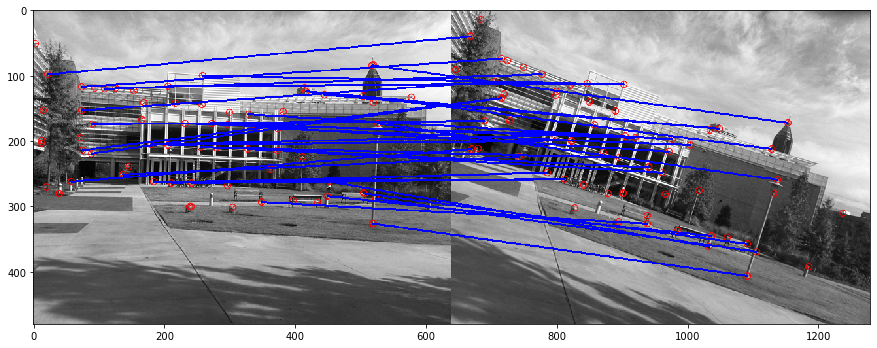

In [39]:
plt.figure(figsize=(15,10))
plt.imshow(mg_paired1_sim)
plt.show()

# c

In [40]:
def solve_affine_equation(f_match, s_match, t_match):
    pt1 = (int(k_points_simA[f_match.queryIdx].pt[0]), int(k_points_simA[f_match.queryIdx].pt[1]))
    pt2 = (int(k_points_simB[f_match.trainIdx].pt[0]), int(k_points_simB[f_match.trainIdx].pt[1]))
    pt3 = (int(k_points_simA[s_match.queryIdx].pt[0]), int(k_points_simA[s_match.queryIdx].pt[1]))
    pt4 = (int(k_points_simB[s_match.trainIdx].pt[0]), int(k_points_simB[s_match.trainIdx].pt[1]))
    pt5 = (int(k_points_simA[t_match.queryIdx].pt[0]), int(k_points_simA[t_match.queryIdx].pt[1]))
    pt6 = (int(k_points_simB[t_match.trainIdx].pt[0]), int(k_points_simB[t_match.trainIdx].pt[1]))
    a, b, c, d, e, f  = symbols('a b c d e f')
    
    eq1 = Eq(a * pt1[0] + b * pt1[1] + c - pt2[0], 0)
    eq2 = Eq(d * pt1[0] + e * pt1[1] + f - pt2[1], 0)
    eq3 = Eq(a * pt3[0] + b * pt3[1] + c - pt4[0], 0)
    eq4 = Eq(d * pt3[0] + e * pt3[1] + f - pt4[1], 0)
    eq5 = Eq(a * pt5[0] + b * pt5[1] + c - pt6[0], 0)
    eq6 = Eq(d * pt5[0] + e * pt5[1] + f - pt6[1], 0)

    return solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))

def check_if_match_is_fitted_affine(match, affine, threshold):
    affine_values = list(affine.values())
    a, b, c, d, e, f = affine_values[0], affine_values[1], affine_values[2], affine_values[3], affine_values[4], affine_values[5]
    
    affine_trans = np.array([[a, b, c], [d, e, f]])
    pt = np.ones(3)
    pt[:2] = k_points_simA[match.queryIdx].pt    
    pred_pt = np.dot(affine_trans, pt)
    err_x = np.abs(int(k_points_simB[match.trainIdx].pt[0]) - int(pred_pt[0]))
    err_y = np.abs(int(k_points_simB[match.trainIdx].pt[1]) - int(pred_pt[1]))
    
    return (err_x < threshold[0]) & (err_y < threshold[1])

In [41]:
def fit_affine(data, threshold):

    num_iterations = math.inf
    iterations_done = 0
    num_sample = 3
    
    max_inlier_count = 0
    best_model = None

    prob_outlier = 0.5
    desired_prob = 0.99
    data_size = len(data)
    
    while num_iterations > iterations_done:
        inliers = []
        samples = random.sample(range(0, len(data) - 1), 3)
        sample_data = data[samples]
        affine_trans = solve_affine_equation(sample_data[0], sample_data[1], sample_data[2])
        for match in matches_sim:
            if check_if_match_is_fitted_affine(match, affine_trans, threshold):
                inliers.append(match)

        inlier_count = len(inliers)
        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_model = affine_trans
            best_inliers = inliers


        prob_outlier = 1 - inlier_count/data_size
        print('# inliers:', inlier_count)
        print('# prob_outlier:', prob_outlier)
        num_iterations = math.log(1 - desired_prob)/math.log(1 - (1 - prob_outlier)**num_sample)
        iterations_done = iterations_done + 1

        print('# s:', iterations_done)
        print('# n:', num_iterations)
        print('# max_inlier_count: ', max_inlier_count)

    return best_model, best_inliers

In [42]:
best_affine_transform, best_affine_inliers = fit_affine(np.array(matches_sim), [40,40])

# inliers: 7
# prob_outlier: 0.8985507246376812
# s: 1
# n: 4408.3088292490975
# max_inlier_count:  7
# inliers: 6
# prob_outlier: 0.9130434782608696
# s: 2
# n: 7001.5853691080765
# max_inlier_count:  7
# inliers: 3
# prob_outlier: 0.9565217391304348
# s: 3
# n: 56028.80303625784
# max_inlier_count:  7
# inliers: 4
# prob_outlier: 0.9420289855072463
# s: 4
# n: 23635.82003746485
# max_inlier_count:  7
# inliers: 4
# prob_outlier: 0.9420289855072463
# s: 5
# n: 23635.82003746485
# max_inlier_count:  7
# inliers: 6
# prob_outlier: 0.9130434782608696
# s: 6
# n: 7001.5853691080765
# max_inlier_count:  7
# inliers: 8
# prob_outlier: 0.8840579710144928
# s: 7
# n: 2952.462153487703
# max_inlier_count:  8
# inliers: 14
# prob_outlier: 0.7971014492753623
# s: 8
# n: 549.0206728129847
# max_inlier_count:  14
# inliers: 4
# prob_outlier: 0.9420289855072463
# s: 9
# n: 23635.82003746485
# max_inlier_count:  14
# inliers: 17
# prob_outlier: 0.7536231884057971
# s: 10
# n: 305.6175130651893
# max

In [43]:
mg_paired2_sim = mg_paired_sim.copy()

In [44]:
for match in best_affine_inliers:
    pt1 = (int(k_points_simA[match.queryIdx].pt[0]), int(k_points_simA[match.queryIdx].pt[1]))
    pt2 = k_points_simB[match.trainIdx].pt
    new_pt2_x = int(pt2[0] + simA_gray.shape[1])
    new_pt2 = (new_pt2_x, int(pt2[1]))
    mg_paired2_sim = cv2.line(mg_paired2_sim, pt1, new_pt2, color = (0, 0, 255), thickness = 2)   

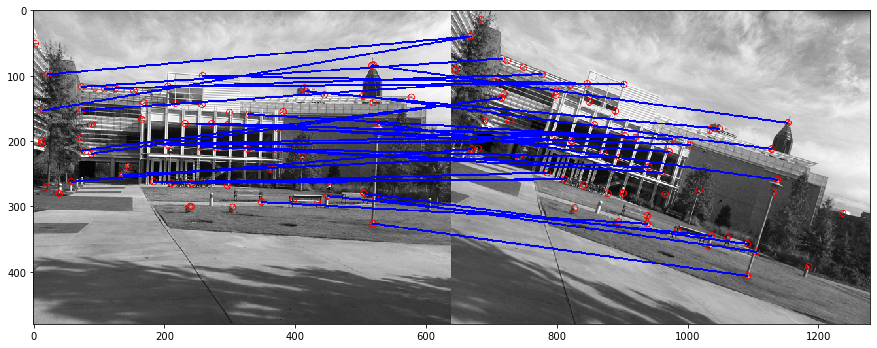

In [45]:
plt.figure(figsize=(15,10))
plt.imshow(mg_paired2_sim)
plt.show()

# d

In [46]:
def warp(im, A, output_shape):
    x = np.zeros((output_shape[0], output_shape[1]))
    
    for i in range(1, output_shape[0]):
        for j in range(1, output_shape[1]):
            M = np.linalg.inv(A).dot(np.array([i,j,1]))
            p, q = M[0], M[1]
            rp = int(round(p))
            rq = int(round(q))
            if rp < im.shape[0] and rp >= 0 and rq < im.shape[1] and rq >= 0:
                x[i, j] = im[rp, rq]

    return x

In [47]:
sim_values = list(best_sim_transform.values())
a, b, c, d= sim_values[0], sim_values[1], sim_values[2], sim_values[3]

sim_trans = np.array([[a, -b, c], [b, a, d], [0, 0, 1]], dtype='float')
warpedB_sim = warp(simB_gray, sim_trans, simA_gray.shape)

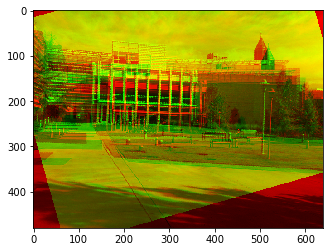

In [48]:
g_c = np.zeros(simA.shape)
g_c[:,:,1] = warpedB_sim
g_c[:,:,0] = simA_gray
g_c = g_c.astype(np.int32)
plt.imshow(g_c, cmap='gray')

# e

In [49]:
affine_values = list(best_affine_transform.values())
a, b, c, d, e, f = affine_values[0], affine_values[1], affine_values[2], affine_values[3], affine_values[4], affine_values[5]

affine_trans = np.array([[a, b, c], [d, e, f], [0, 0, 1]], dtype='float')
warpedB_affine = warp(simB_gray, affine_trans, simA_gray.shape)

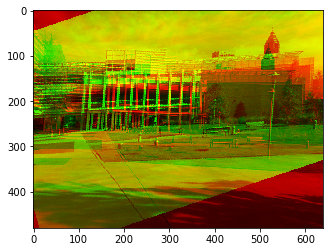

In [53]:
g_c_affine = np.zeros(simA.shape)
g_c_affine[:,:,1] = warpedB_affine
g_c_affine[:,:,0] = simA_gray
g_c_affine = g_c_affine.astype(np.int32)
plt.imshow(g_c_affine, cmap='gray')